## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
# Combine the data into a single dataset
all_trials_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
all_trials_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
means = all_trials_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = all_trials_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = all_trials_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sdevs = all_trials_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sems = all_trials_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Display dataframe
summary_df = pd.DataFrame({"Mean Tumor Volume" : means,
                         "Median Tumor Volume" : medians,
                         "Variance of Tumor Volumes" : variances,
                         "STDEV of Tumor Volumes" : sdevs,
                          "SEM of Tumor Volumes" : sems})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,STDEV of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
summary_df = summary_df.sort_values("Mean Tumor Volume", ascending = True)
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,STDEV of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236


## Bar plots

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = all_trials_df["Drug Regimen"]
measurements = all_trials_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
trials_plot = all_trials_df.plot(x = x_axis, y = measurements, kind = 'bar')

KeyError: "None of [Index(['Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane',\n       'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane',\n       ...\n       'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol',\n       'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol'],\n      dtype='object', length=1893)] are in the [columns]"

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = all_trials_df["Drug Regimen"]
measurements = all_trials_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
plt.bar(x_axis, measurements)
plt.title("Data Points per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
# plt.xlim(,)
# plt.ylim(,)

## Pie plots

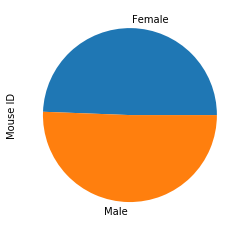

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = all_trials_df.groupby(["Sex"]).count()["Mouse ID"]
mf_plot = mice_sex.plot.pie(y = 'mice_sex')

([<matplotlib.patches.Wedge at 0x22cb77c88c8>,
 [Text(0.02099250347258556, 1.0997996703027118, ''),
  Text(-0.020992503472586185, -1.0997996703027118, '')])

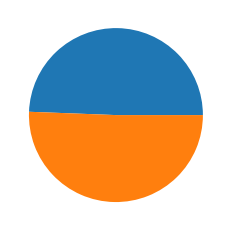

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = all_trials_df.groupby(["Sex"]).count()["Mouse ID"]
plt.pie(mice_sex)

## Quartiles, outliers and boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_volume = all_trials_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
quartiles = tumor_volume.quartile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

Mouse ID
a203    56.312708
a251    55.237095
a262    58.611631
a275    52.770965
a366    54.639906
          ...    
z435    46.942214
z578    38.411510
z581    53.979584
z795    54.880317
z969    60.194652
Name: Tumor Volume (mm3), Length: 249, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x22cb765c448>,
 'caps': [<matplotlib.lines.Line2D at 0x22cb765cf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cb7667bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x22cb7659a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cb7659bc8>],
 'means': [<matplotlib.lines.Line2D at 0x22cb7659f88>]}

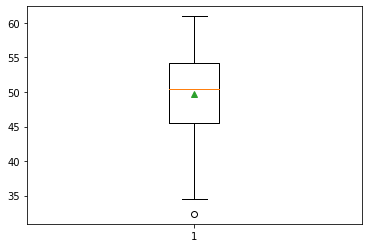

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax1 = plt.subplots(2, 2)
plt.boxplot(tumor_volume, showmeans = True)
# plt.boxplot(tumor_volume["Ramicane"], showmeans = True)
# plt.boxplot(tumor_volume["Capomulin"], showmeans = True)
# plt.boxplot(tumor_volume["Propriva"], showmeans = True)
# plt.boxplot(tumor_volume["Ceftamin"], showmeans = True)

## Line and scatter plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point = all_trials_df.groupby(["Drug Regimen"])["Timepoint"]
plt.plot(time_point["Capomulin"], tumor_volume["Capomulin"])
plt.title("Tumor Response to Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

IndexError: Column(s) Timepoint already selected

Text(0, 0.5, 'Tumor Volume (mm3)')

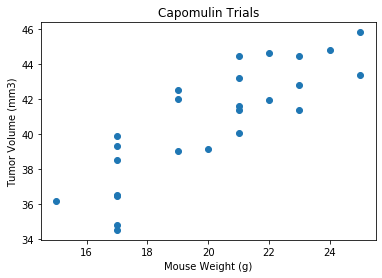

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = all_trials_df[all_trials_df['Drug Regimen'] == "Capomulin"]
weight = capomulin_mice.groupby(["Mouse ID"]).mean()["Weight (g)"]
volume = capomulin_mice.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
plt.scatter(weight, volume)
plt.title("Capomulin Trials")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In [36]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
correlation = st.pearsonr(weight, volume)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumor_volume)

ValueError: all the input array dimensions except for the concatenation axis must match exactly